# Modelleren van een rupsenuitbraak volgens de logistische groei

Eerder bekeek je het exponentiële groeimodel om een populatie rupsen voor te stellen. Je stelde hierbij vast dat je ooit op een limiet moeten botsen: een tuin heeft geen onbeperkte draagkracht! In dit hoofdstuk bekijk je daarom de logistische groei. Dit model heeft een verrassende eigenschap: het kan chaotisch zijn, waardoor het voor bepaalde waarden totaal onvoorspelbaar is!

## Logistische groei

**Je zoekt een regel die rekening houdt met de draagkracht van het systeem.** Er wordt verwacht dat wanneer de populatiegrootte klein is, en er dus veel planten per rups zijn, onbelemmerde groei mogelijk is. Wanneer het aantal rupsen dicht bij de draagkracht $K$ komt, moet de groei stoppen. De volgende regel kan hiervoor gebruikt worden:

$$u_t = \left[1 + (a - 1) \left(1 - \frac{u_{t - 1}}{K}\right)\right] u_{t - 1} = \left[1 + r \left(1 - \frac{u_{t - 1}}{K}\right)\right] u_{t - 1}$$

Dit is het recursieve voorschrift van een meetkundige rij, waarbij $a$ de groeifactor en $r$ het groeipercentage voorstelt. Ook hier geldt dat als je $u_0$ kent, je stapsgewijs elk element uit de rij kan berekenen.

Uit het functievoorschrift stel je vast dat als $u_{t - 1}$ klein is, het gedeelte tussen ronde haakjes ongeveer gelijk is aan $1$. Je bekomt dan bij benadering terug de exponentiële groei:

$$u_t = \left[1 + r \left(1 - \frac{u_{t - 1}}{K}\right)\right] u_{t - 1} \approx (1 + r) \cdot u_{t - 1} = a \cdot u_{t - 1}$$

Herinner je dat $a$ hierbij de groeifactor voorstelt. Wanneer $u_{t - 1}$ bij benadering gelijk is aan $K$, dan is het deel tussen ronde haakjes ongeveer gelijk aan $0$, en zal de populatiegrootte in de volgende stap min of meer gelijk zijn:

$$u_t = \left[1 + r \left(1 - \frac{u_{t - 1}}{K}\right)\right] u_{t - 1} \approx u_{t - 1}$$

De populatiegrootte stabiliseert dus.

Een model waarbij de populatie aangroeit volgens het voorgestelde recursieve voorschrift wordt een **logistisch model** genoemd!

## Interactieve notebook

Nu ga je aan de slag met een interactieve online notebook, waarin je Python zal gebruiken om dit model grafisch voor te stellen.

[![Knop](files/knop.png "Knop")](https://kiks.ilabt.imec.be/jupyterhub/?id=6010 "Insect logistisch")

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Modelleren van een rupsenuitbraak volgens de logistische groei

## Logistische groei

Net als in de vorige module, kan je ook bij de logistische groei het recursieve voorschrift omzetten in code:

In [1]:
def logistische_groei(u, a, K):
    '''
    Recursief voorschrift van de logistische groei
    
    Parameters
    ----------
    u: float
        de initiële populatiegrootte
    a: float
        de groeifactor
    K: int
        de draagkracht
    
    Output
    ------
    float
        de nieuwe populatiegrootte
    '''
    
    return (1 + (a - 1) * (1 - u / K)) * u

### Opdracht 1

Simuleer enkele stappen van de logisitische groei, met $u_0 = 5$, $a = 1{,}6$ en $K = 10000$. Gebruik hiervoor de variabelen $u_1$ tot en met $u_4$, en print deze uit.

In [2]:
u_0 = 5
a = 1.6
K = 10000

u_1 = logistische_groei(u_0, a, K)
print(u_1)

u_2 = logistische_groei(u_1, a, K)
print(u_2)

u_3 = logistische_groei(u_2, a, K)
print(u_3)

u_4 = logistische_groei(u_3, a, K)
print(u_4)

7.998500000000001
12.793761439865001
20.460197483877195
32.71119879333876


Vergelijk deze resultaten met deze van de exponentiele groei in het vorige hoofdstuk. Wat merk je op?

De groei ziet er gelijkaardig uit, omdat je na vier stappen nog erg ver van de draagkracht zit: $\frac{32.711}{10000} \approx 0,03$. Je stelt wel vast dat de bekomen waarden iets lager zijn dan bij de exponentiële groei.

### Opdracht 2

Maak een grafiek die de populatiegrootte van de eerste 70 generaties rupsen voorstelt. Vul daarbij alle TODOs in onderstaande code in. Merk op dat je nu anders te werk gaat dan bij de exponentiële groei: je genereert telkens het volgende element in de rij door het recursieve voorschrift toe te passen op het vorige element.

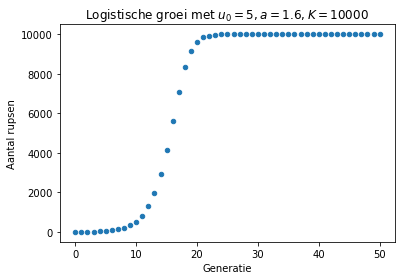

In [3]:
# importeer de nodige bibliotheken
from matplotlib import pyplot as plt
import numpy as np

# TODO: initaliseer een rij met gehele getallen van 0 tot en met 50
data_t = np.arange(51)

# bereken de populatiegroottes op tijdstip t
data_u = np.array([u_0])
for t in range(50):
    data_u = np.append(data_u, logistische_groei(data_u[-1], a, K))

# TODO: maak een nieuwe grafiek aan
plt.figure()

# TODO: plot alle punten
plt.scatter(data_t, data_u, 20)

# TODO: breng verduidelijkende labels aan
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')

# TODO: voeg een titel toe
plt.title('Logistische groei met $u_0 = 5, a = 1.6, K = 10000$')

# TODO: toon de grafiek
plt.show()

Hier zie je een kwalitatief verschil met de exponentiele groei: in plaats van ongelimiteerde groei, stel je vast dat de groei na ongeveer twintig generaties begint te temperen!

### Opdracht 3

Hoeveel rupsen zijn er na 10 generaties? Hoeveel na 30? Hoeveel na 50?

In [4]:
for t in [10, 30, 50]:
    print(f'Aantal rupsen na {t} dagen: {data_u[t]:.0f}')

Aantal rupsen na 10 dagen: 532
Aantal rupsen na 30 dagen: 10000
Aantal rupsen na 50 dagen: 10000


De populatiegrootte waarnaar geconveergeerd wordt heet de **evenwichtswaarde**. Deze wordt genoteerd als $u_{eq}$, waarbij "eq" staat voor equilibrium). Als de populatie op dat moment stabiel is, moet er gelden dat:

$$u_{eq} = \left[1 + (a - 1) \left(1 - \frac{u_{eq}}{K} \right)\right] u_{eq}$$

### Opdracht 4

Bepaal de oplossingen voor $u_{eq}$, als je ervan uit mag gaan dat $a > 1$ en $K > 0$. Komen deze waarden overeen met je eerdere vaststelling?

$$u_{eq} = \left[1 + (a - 1) \left(1 - \frac{u_{eq}}{K} \right)\right] u_{eq} \iff u_{eq} = 0 \lor \left[1 + (a - 1) \left(1 - \frac{u_{eq}}{K} \right)\right] = 1 \iff u_{eq} = 0 \lor 1 - \frac{u_{eq}}{K} = 0 \iff u_{eq} = 0 \lor u_{eq} = K$$

### Opdracht 5

Gebruik je eerder geschreven code om een functie `plot_logistische_groei` te implementeren, die vertrekkende vanuit een populatiegrootte $u_0$ de populatiegroote van de $50$ volgende generaties berekent voor een gegeven $a$ en $K$, en het bijhorende spreidinsgdiagram genereert. Zorg ervoor dat de y-as telkens gelimiteerd wordt tot het interval $[0, 18000]$. Hoe je dit doet, vind je [hier](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylim.html) terug.

In [5]:
def plot_logistische_groei(u_0, a, K):
    '''
    Functie die de populatiegrootte doorheen de tijd plot in een spreidingsdiagram
    
    Parameters
    ----------
    u_0: float
        de initiële populatiegrootte
    a: float
        de groeifactor
    K: int
        de draagkracht
    '''
    
    # initaliseer een rij met gehele getallen van 0 tot en met 50
    data_t = np.arange(51)
    
    # bereken de populatiegroottes op tijdstip t
    data_u = np.array([u_0])
    for t in range(50):
        data_u = np.append(data_u, logistische_groei(data_u[-1], a, K))
    
    # maak een nieuwe grafiek aan
    plt.figure()
    
    # plot alle punten
    plt.scatter(data_t, data_u, 20)
    
    # limiteer de y-as tot het interval [0, 1800]
    ax = plt.gca()
    ax.set_ylim(0, 18000)
    
    # breng verduidelijkende labels aan
    plt.xlabel("Generatie")
    plt.ylabel("Aantal rupsen")
    
    # voeg een titel toe
    plt.title(f"Logistische groei met $u_0 = {u_0}, a = {a}, K = {K}$")
    
    # toon de grafiek
    plt.show()

### Opdracht 6

Gebruik deze functie nu om de grafieken te genereren voor alle $u_0 \in \{4000, 8000, 12000, 16000\}$. Wat stel je vast?

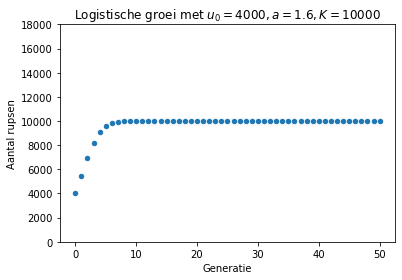

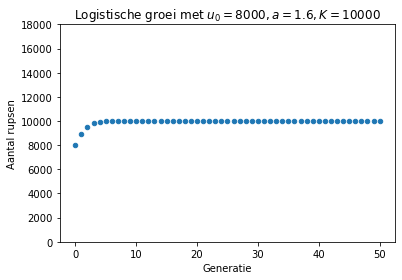

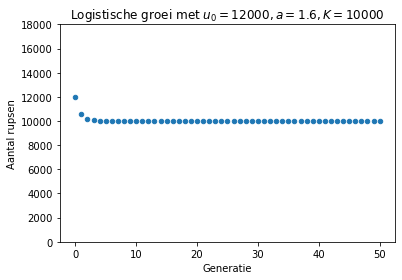

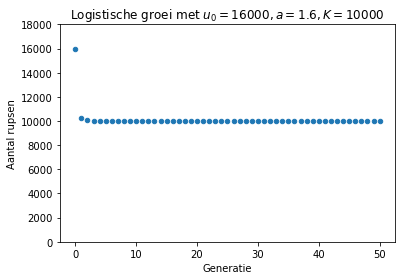

In [6]:
for u_0 in [4000, 8000, 12000, 16000]:
    plot_logistische_groei(u_0, 1.6, 10000)

## Schommelingen in de populatie

Wat als je andere waarden beschouwt voor de groeifactor $a$? Indien je $a = 3{,}34$ gebruikt, stel je een compleet ander gedrag vast:

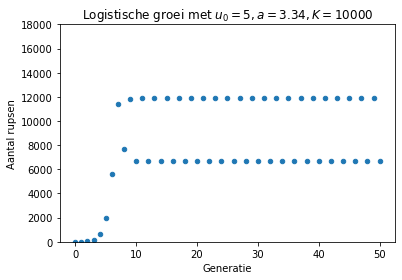

In [7]:
plot_logistische_groei(5, 3.34, 10000)

Stel vast dat de populatie niet convergeert naar een evenwichtswaarde $x_{eq}$, maar een **periodiek gedrag** vertoont: de ene generatie is de populatiegrootte minder dan verwacht bij evenwicht, de volgende generatie terug meer. In dit geval heb je dan ook te maken met een **divergente** rij.

> **Waarschuwing**
> Het is dus niet zo omdat er een evenwichtstoestand bestaat, dat deze noodzakelijk bereikt wordt!

Hier zie je dat de populatiegrootte zich elke twee generaties herhaalt; je kan dan spreken over een periode van twee.

### Opdracht 7

Genereer een gelijkaardige grafiek voor $a = 3{,}455$. Wat stel je nu vast?

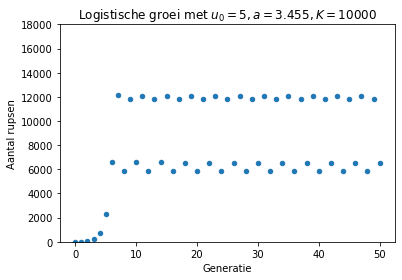

In [8]:
plot_logistische_groei(5, 3.455, 10000)

Als alles goed is, neem je nu een periode van vier waar!

## Een wispelturige populatiegrootte

Logistische groei lijkt niet zo gecompliceerd: ofwel convergeert de rij naar een vaste waarde $u_{eq} = K$, ofwel gaat de populatiegrootte op en neer volgens een regelmatig patroon. Blijft deze groei makkelijk te voorspellen?

### Opdracht 8

Genereer een gelijkaardige grafiek voor $a = 3{,}6$. Wat stel je nu vast?

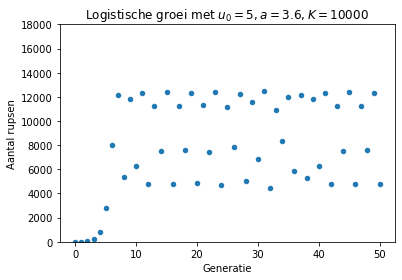

In [9]:
plot_logistische_groei(5, 3.6, 10000)

Hier gaat de populatiegrootte op en neer, maar zonder enige regelmaat. Soms lijkt het alsof de grootte voor een tijdje gewoon terug oscilleert om dan plots het patroon te doorbreken. Wat gebeurt er als je verschillende startwaarden beschouwt?

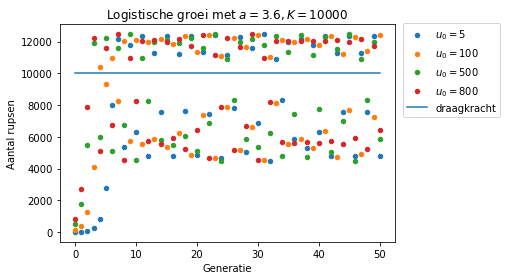

In [10]:
# definieer a en K
a = 3.6
K = 10000

# initaliseer een rij met gehele getallen van 0 tot en met 50
data_t = np.arange(51)

# maak een nieuwe grafiek aan
plt.figure()

# itereer over verschillende waarden voor u_0
for u_0 in [5, 100, 500, 800]:
    
    # bereken de populatiegroottes op tijdstip t
    data_u = np.array([u_0])
    for t in range(50):
        data_u = np.append(data_u, logistische_groei(data_u[-1], a, K))
    
    # plot alle punten
    plt.scatter(data_t, data_u, 20)

# plot u = K
plt.plot([0, 50], [K, K])

# voeg een legende toe
plt.legend(["$u_0 = 5$", "$u_0 = 100$", "$u_0 = 500$", "$u_0 = 800$",
            "draagkracht"], loc='upper right', bbox_to_anchor=(1.33, 1.027))

# breng verduidelijkende labels aan
plt.xlabel("Generatie")
plt.ylabel("Aantal rupsen")

# voeg een titel toe
plt.title(f"Logistische groei met $a = {a}, K = {K}$")

# toon de grafiek
plt.show()

Stel vast dat de tijdsreeksen compleet verschillend zijn. Logisch, denk je misschien, want ze zijn allemaal op compleet verschillende plaatsen begonnen. Wat gebeurt er als je de reeksen begint met startwaarden die licht van elkaar verschillen?

### Opdracht 9

Start nu van alle waarden $u_0$ in $\{4{,}998, 4{,}999, 5, 5{,}001, 5{,}002\}$. Wat stel je vast?

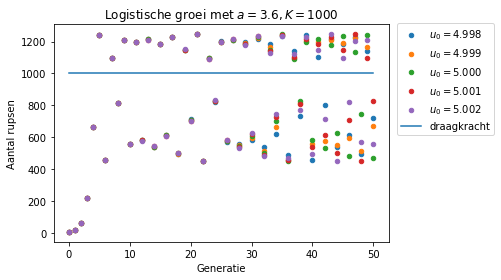

In [11]:
a = 3.6
K = 1000
data_t = np.arange(51)
plt.figure()
for u_0 in [4.998, 4.999, 5, 5.001, 5.002]:
    data_u = np.array([u_0])
    for t in range(50):
        data_u = np.append(data_u, logistische_groei(data_u[-1], a, K))
    plt.scatter(data_t, data_u, 20)
plt.plot([0, 50], [K, K])
plt.legend(["$u_0 = 4.998$", "$u_0 = 4.999$", "$u_0 = 5.000$",
            "$u_0 = 5.001$", "$u_0 = 5.002$", "draagkracht"],
           loc='upper right', bbox_to_anchor=(1.33,1.027))
plt.xlabel("Generatie")
plt.ylabel("Aantal rupsen")
plt.title(f"Logistische groei met $a = {a}, K = {K}$")
plt.show()

Als alles goed is, lopen de reeksen met verschillende startwaarden samen voor ongeveer 20 generaties. Daarna lopen de tijdreeksen weer helemaal verschillend.

Voor bepaalde waarden van de groeisnelheid worden heel kleine verschillen in de populatiegrootte geamplificeerd. Dit gedrag wordt chaos genoemd: kleine verschillen in de startcondities leiden op termijn tot grote verschillen in de uitkomst. Indien onze rupsenpopulatie zich chaotisch zou gedragen, is het erg moeilijk om op lange termijn te voorspellen wat de populatiegrootte zal zijn.

In de volgende notebook ontdek je meer over dit chaotische gedrag!